In [5]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 50)  
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.rcParams.update(
    {
        "axes.facecolor": "#FFF9ED",
        "figure.figsize": (6, 4),
        "figure.facecolor": "w",
        "axes.titlesize": 12,
        "legend.frameon": True,
        "legend.facecolor": "inherit",
        "lines.linewidth": 1.2,
        "font.size": 10.0,
        "axes.grid": False
    }
)
from sklearn import cluster
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import manifold
from sklearn import decomposition
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import re

df = pd.read_csv('./marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
df.shape

(2240, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<Axes: xlabel='Education', ylabel='count'>

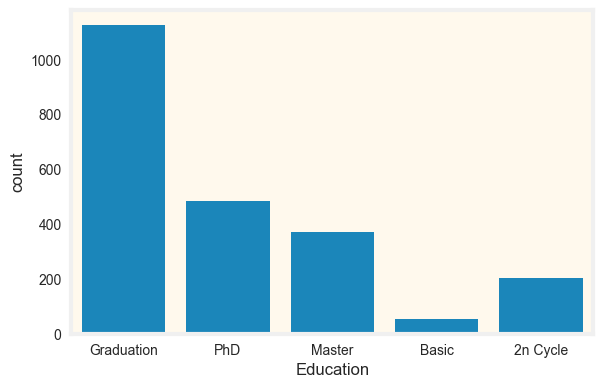

In [11]:
sns.countplot(x=df['Education'])

<Axes: xlabel='Marital_Status', ylabel='count'>

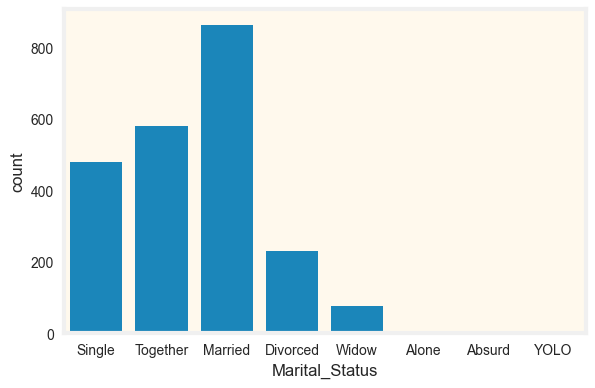

In [12]:
sns.countplot(x=df['Marital_Status'])

In [13]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df['Dt_Customer'].value_counts()

Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64

In [16]:
df["Dt_Customer"] = df["Dt_Customer"].apply(pd.to_datetime, dayfirst=True, errors="coerce")

In [17]:
df["Dt_Customer"].agg(["min", "max"])

min   2012-07-30
max   2014-06-29
Name: Dt_Customer, dtype: datetime64[ns]

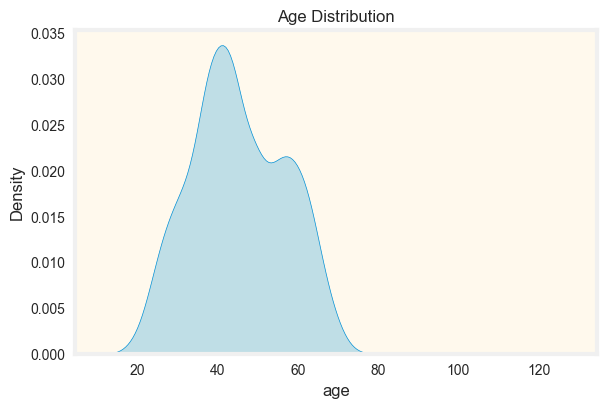

In [18]:
df["age"] = 2014 - df["Year_Birth"]
ax = plt.axes()
sns.kdeplot(
    data=df,
    x="age",
    fill=True,
    ax=ax,
)
ax.set_title("Age Distribution")
plt.show()

<Axes: xlabel='Education', ylabel='count'>

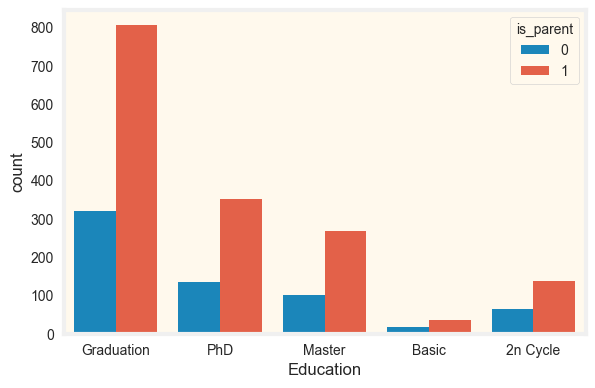

In [20]:
df["is_parent"] = (df[["Kidhome", "Teenhome"]].sum(axis=1) > 0).astype(int)
sns.countplot(x=df["Education"], hue=df["is_parent"])

In [21]:
def extract_day(date):
    day = str(date).split(" ", 1)[0]
    return pd.to_numeric(day, errors="coerce")

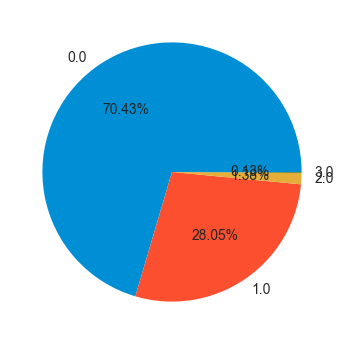

In [22]:
days_to_acquire = df["Dt_Customer"].sort_values().diff()
days_to_acquire = days_to_acquire.apply(extract_day).value_counts()

plt.pie(days_to_acquire, labels=days_to_acquire.index, autopct="%.2f%%")
plt.show()

<Axes: xlabel='month'>

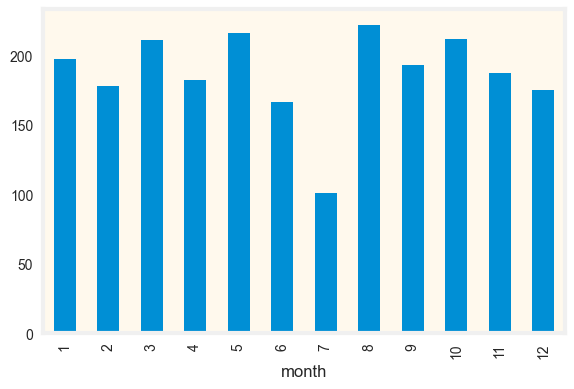

In [23]:
df["month"] = df["Dt_Customer"].dt.month
df["year"] = df["Dt_Customer"].dt.year
df.groupby("month").ID.count().plot(kind="bar")

<Axes: xlabel='customer_for', ylabel='Count'>

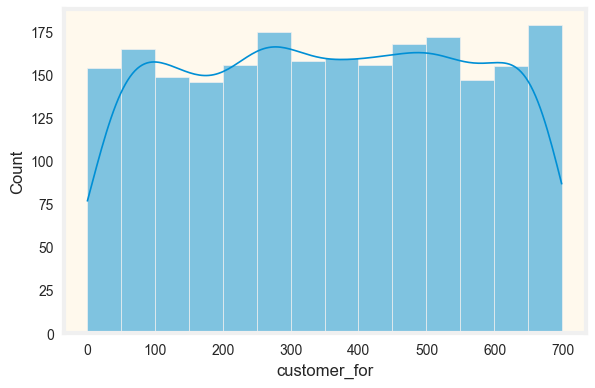

In [24]:
df["customer_for"] = df["Dt_Customer"].max() - df["Dt_Customer"]
df["customer_for"] = df["customer_for"].apply(extract_day)

fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=df, x="customer_for", ax=ax, kde=True)

In [25]:
df["amount_spent"] = df[
    "MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds".split()
].sum(axis=1)
df["life_time_value"] = df["amount_spent"] / ((df["customer_for"] + 1) / 365)

In [26]:
df["Living_With"] = df["Marital_Status"].replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)
df["Children"] = df[["Kidhome", "Teenhome"]].sum(axis=1)
df["Family_Size"] = (
    df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]
)


df["Education"] = df["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)


df = df.rename(
    columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
    }
)


to_drop = [
    "Marital_Status",
    "Dt_Customer",
    "Z_CostContact",
    "Z_Revenue",
    "Year_Birth",
    "ID",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "Complain",
    "Response",
]
X = df.drop(to_drop, axis=1, errors="ignore")

In [27]:
skewness = X.skew(numeric_only=True).sort_values(ascending=False)

In [28]:
n_unique = X.nunique()
categorical_columns = ["Education", "Living_With"]
highly_skewed = skewness[np.abs(skewness) > 0.75].index.to_list()
lowly_skewed = skewness[np.abs(skewness) <= 0.75].index.to_list()

In [29]:
transformers = ColumnTransformer(
    transformers=[
        ("ohe", preprocessing.OneHotEncoder(drop="if_binary"), categorical_columns),
        ("scaler", preprocessing.StandardScaler(), lowly_skewed),
        (
            "log+scaler",
            make_pipeline(
                IterativeImputer(),
                preprocessing.FunctionTransformer(
                    np.log1p, feature_names_out="one-to-one"
                ),
                preprocessing.StandardScaler(),
            ),
            highly_skewed,
        ),
    ],
    remainder="passthrough",
)

In [30]:
X = transformers.fit_transform(X)

columns = transformers.get_feature_names_out()
columns = list(map(lambda x: x.split("__")[-1], columns))

X = pd.DataFrame(X, columns=columns)

In [31]:
pca = decomposition.PCA(0.9)
pca.fit(X)
x_pca = pd.DataFrame(
    pca.transform(X), columns=[f"PC{i}" for i in range(2, pca.n_components_ + 2)]
)
pca.n_components_, pca.explained_variance_ratio_.sum()

(12, 0.9029168329832896)

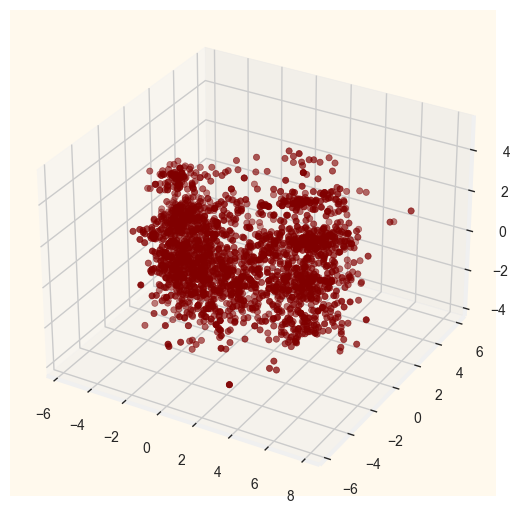

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs=x_pca.iloc[:, 0],
    ys=x_pca.iloc[:, 1],
    zs=x_pca.iloc[:, 2],
    c="maroon",
    marker="o",
)
plt.show()

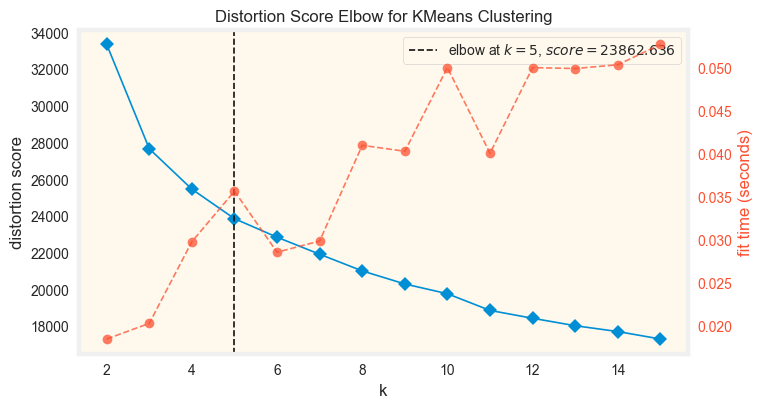

In [34]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(7, 4))
Elbow_M = KElbowVisualizer(cluster.KMeans(n_init=10), k=15, ax=ax)
Elbow_M.fit(x_pca)
Elbow_M.show()
plt.show()

In [35]:
kmeans = cluster.KMeans(n_clusters=Elbow_M.elbow_value_, n_init=10)
kmeans.fit(x_pca)
clusters = kmeans.predict(x_pca) + 1

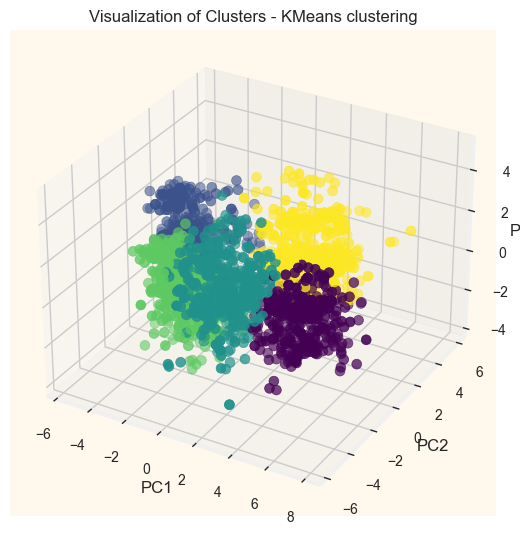

In [36]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs=x_pca.iloc[:, 0],
    ys=x_pca.iloc[:, 1],
    zs=x_pca.iloc[:, 2],
    marker="o",
    c=clusters,
    s=50,
    cmap="viridis",
)
ax.set(
    xlabel="PC1",
    ylabel="PC2",
    zlabel="PC3",
    title="Visualization of Clusters - KMeans clustering",
)
plt.show()

In [37]:
kmeans_data = df.copy()
kmeans_data["cluster"] = kmeans.predict(x_pca) + 1

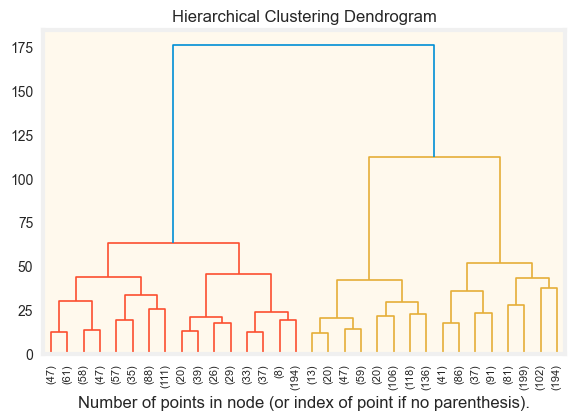

In [38]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

   
    dendrogram(linkage_matrix, **kwargs)



model = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(x_pca)
plt.title("Hierarchical Clustering Dendrogram")

plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=90)
plt.show()

In [39]:
agglo_model = cluster.AgglomerativeClustering(n_clusters=4, linkage="ward")
agglo_model.fit(x_pca)
labels = agglo_model.labels_ + 1
np.unique(labels, return_counts=True)

(array([1, 2, 3, 4], dtype=int64), array([831, 386, 519, 504], dtype=int64))

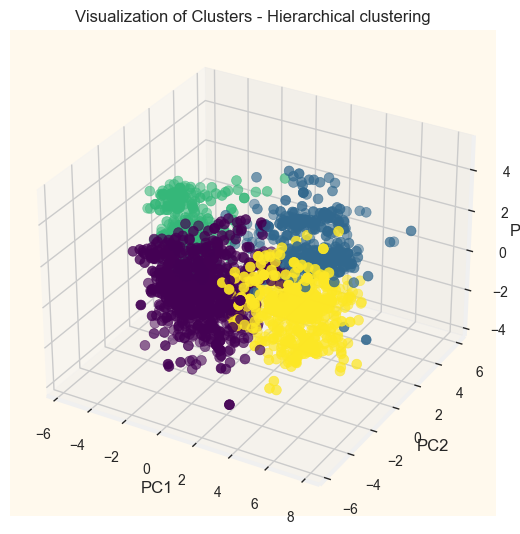

In [40]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs=x_pca.iloc[:, 0],
    ys=x_pca.iloc[:, 1],
    zs=x_pca.iloc[:, 2],
    marker="o",
    c=labels,
    s=50,
    cmap="viridis",
)
ax.set(
    xlabel="PC1",
    ylabel="PC2",
    zlabel="PC3",
    title="Visualization of Clusters - Hierarchical clustering",
)
plt.show()

In [41]:
columns_to_examine = [
    "Education",
    "Living_With",
    "Income",
    "Recency",
    "Wines",
    "Fruits",
    "Meat",
    "Fish",
    "Sweets",
    "Gold",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "age",
    "customer_for",
    "life_time_value",
    "amount_spent",
    "Children",
]

agglo_data = df[columns_to_examine].copy()
agglo_data["Cluster"] = labels

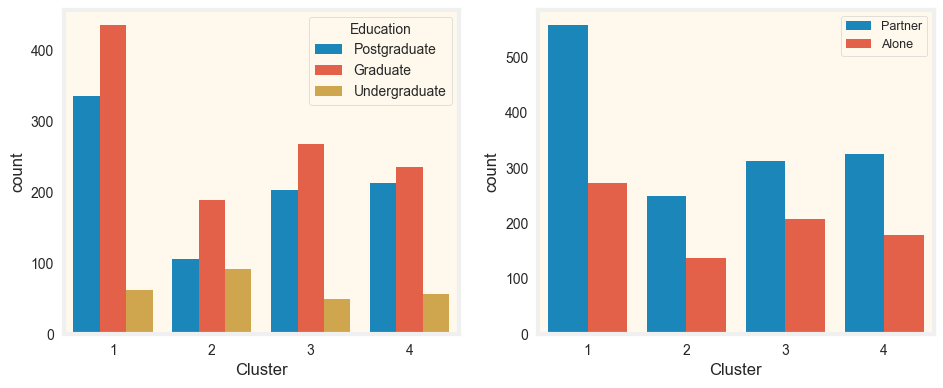

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(data=agglo_data, x="Cluster", hue="Education", ax=ax1)
sns.countplot(data=agglo_data, x="Cluster", hue="Living_With", ax=ax2)
ax2.legend(fontsize=9)

<Axes: xlabel='Cluster', ylabel='amount_spent'>

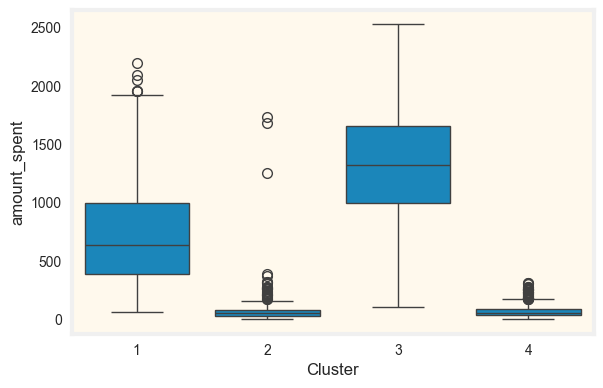

In [43]:
avg_spending = agglo_data.groupby("Cluster")[["amount_spent"]].mean()
sns.boxplot(data=agglo_data, x="Cluster", y="amount_spent")

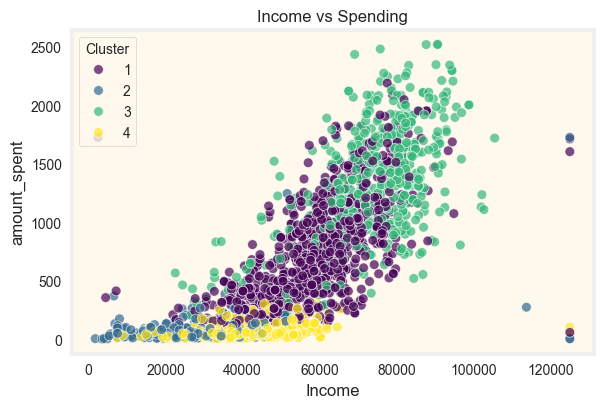

In [44]:
agglo_data["Income"] = agglo_data["Income"].clip(0, 125000)
sns.scatterplot(
    data=agglo_data,
    x="Income",
    y="amount_spent",
    hue="Cluster",
    palette="viridis",
    alpha=0.7,
)
plt.title("Income vs Spending")
plt.show()

In [45]:
spending_by_cluster = agglo_data.groupby("Cluster")["amount_spent"].sum()
commodities = "Wines Fruits Meat Fish Sweets Gold".split()
avg_spending_by_commodity = agglo_data.groupby("Cluster")[commodities].sum()
proportion = avg_spending_by_commodity.T / spending_by_cluster
proportion.style.background_gradient(cmap="viridis", axis=0).set_caption(
    '<span style="color: blue; font-size: 17px;">Proportion of spending on commodies</span>'
)

Cluster,1,2,3,4
Wines,0.576900,0.281359,0.444472,0.532935
Fruits,0.038419,0.069201,0.047250,0.031328
Meat,0.209823,0.302707,0.335128,0.213709
Fish,0.052772,0.086628,0.069425,0.050747
Sweets,0.040245,0.075400,0.047635,0.035272
Gold,0.081841,0.184705,0.056091,0.136009


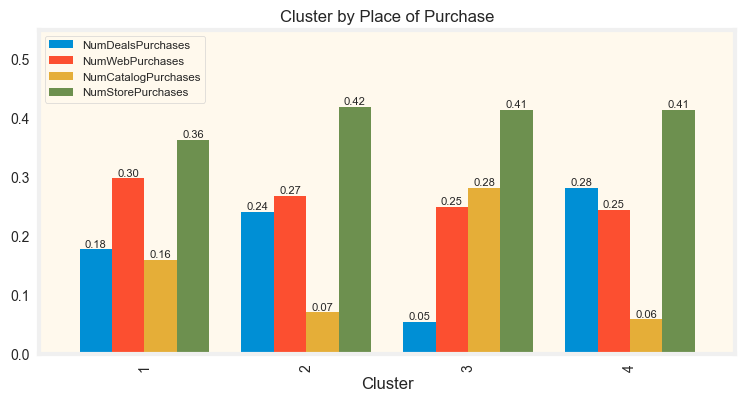

In [46]:
places = (
    "NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases".split()
)

by_place_of_purchase = agglo_data.groupby("Cluster")[places].sum()
by_place_of_purchase = by_place_of_purchase.apply(lambda x: x / np.sum(x), axis=1)

ax = plt.axes()
by_place_of_purchase.plot(kind="bar", figsize=(8, 4), ax=ax, width=0.8, ylim=(0, 0.55))
ax.legend(fontsize=8.3, loc=2)
for i in ax.containers:
    plt.bar_label(i, fmt="%.2f", fontsize=8)
ax.set_title("Cluster by Place of Purchase")
plt.show()

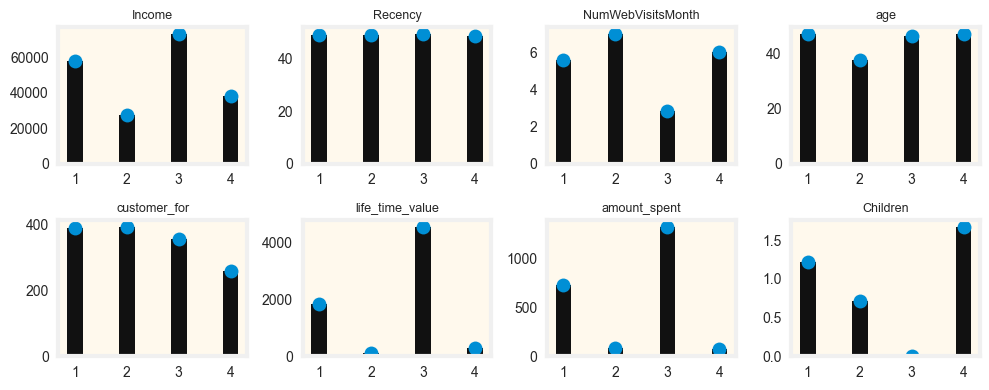

In [47]:
other_num_cols = agglo_data.drop(
    [*commodities, *places, "Education", "Living_With", "Cluster"], axis=1
).columns
fig, axes = plt.subplots(2, 4, figsize=(10, 4))
data = agglo_data.groupby("Cluster")[other_num_cols].mean()
axes = axes.flatten()
for col, ax in zip(other_num_cols, axes):
    data.sort_values(by=col, ascending=False, inplace=True)
    ax.plot(data.index, data[col], marker="o", ls="", ms=10)
    ax.bar(data.index, data[col], width=0.3, color="k")
    ax.set_title(f"{col}", size=9)
plt.tight_layout()

##### Clusters Characteristics

- Cluster 1
  - Medium income & high spending
  - Spends more on wines
  - Medium lifetime value
  - Loyal customers
  - Mostly buy from store and online

- Cluster 2
  - Low income & low spending
  - Low lifetime value
  - Spends more on meat
  - Veteran customers
  - Mostly buy from store and online 

- Cluster 3
  - High income & high spending 
  - Spends more on wines and meat
  - Mostly do not have children
  - High lifetime value
  - Regular customers
  - Mostly buy from store & catalogue

- Cluster 4 
  - Low income & medium spending
  - Mostly new customers
  - Spends more on wines
  - Mostly buy from store and deals